In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

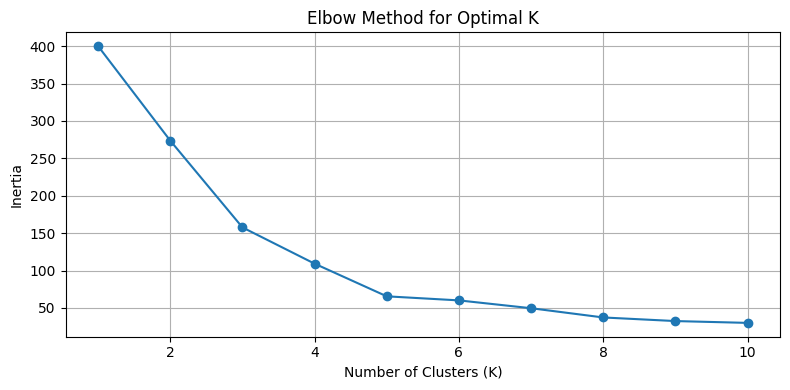

In [8]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

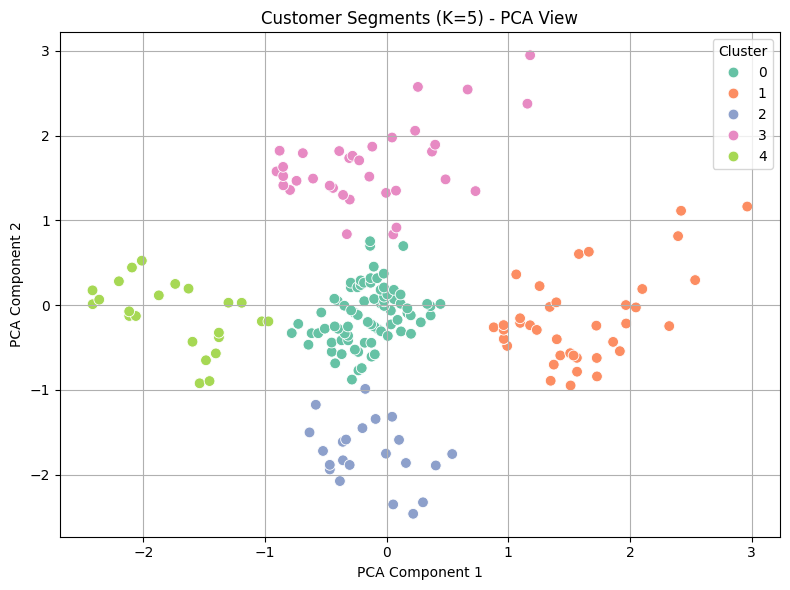

In [10]:
pca_df = pd.DataFrame(pca_features, columns=["PCA1", "PCA2"])
pca_df["Cluster"] = cluster_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=60)
plt.title("Customer Segments (K=5) - PCA View")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
sil_score = silhouette_score(scaled_features, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.5547
